# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `black`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [34]:
"""
rows: 333
columns: 15
"""
df.shape

(333, 15)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [36]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [8]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


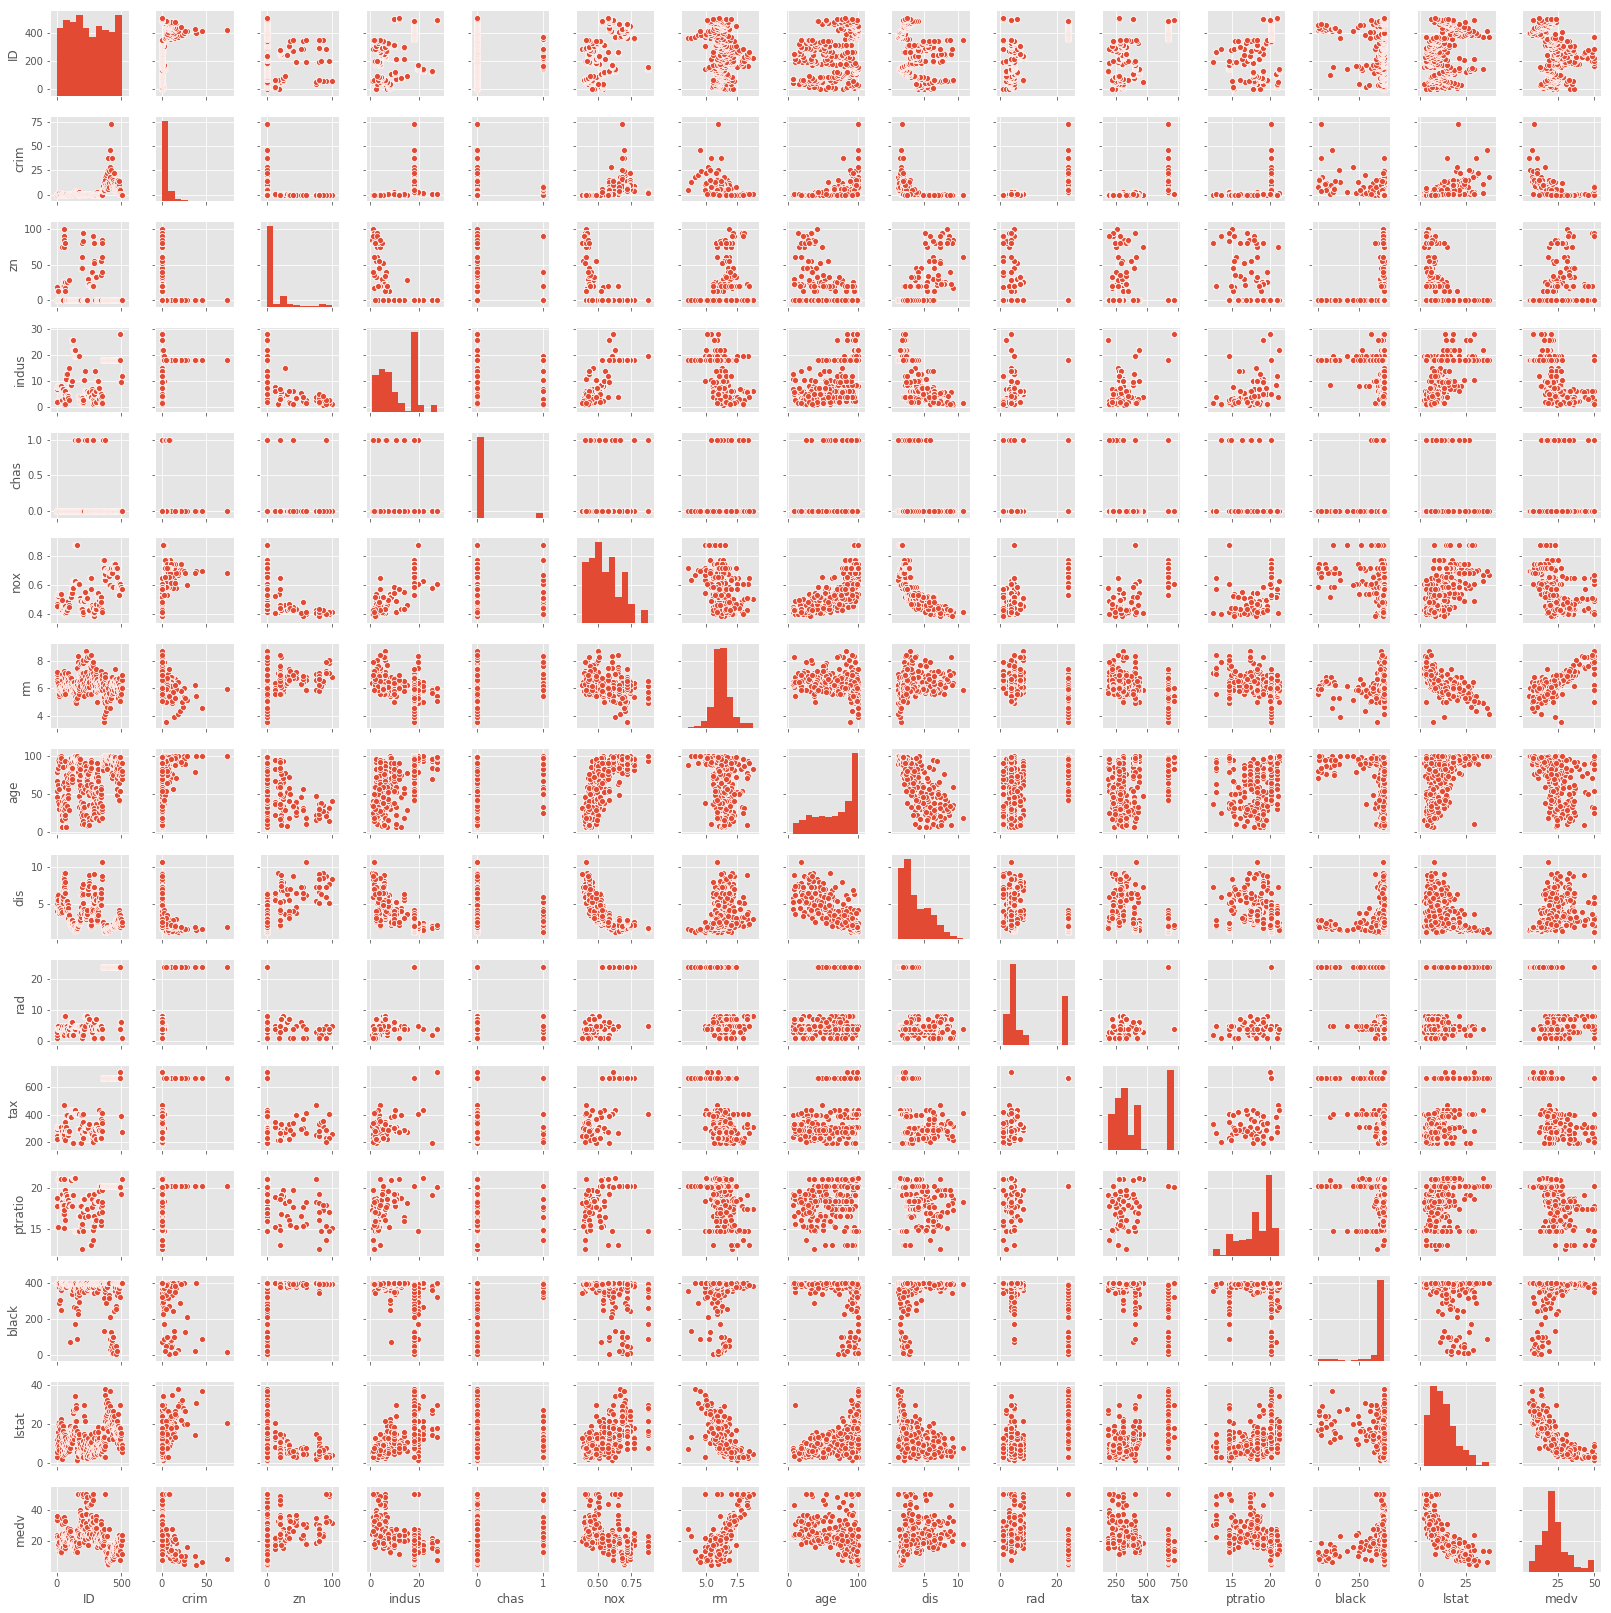

In [18]:
sns.pairplot(df, height=1.5);

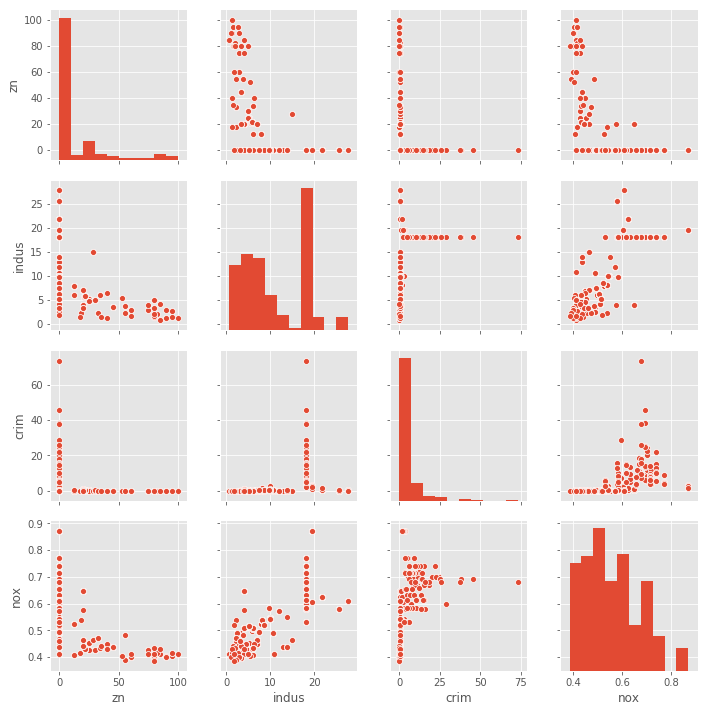

In [22]:
cols = ['zn','indus','crim','nox']
sns.pairplot(df[cols]);

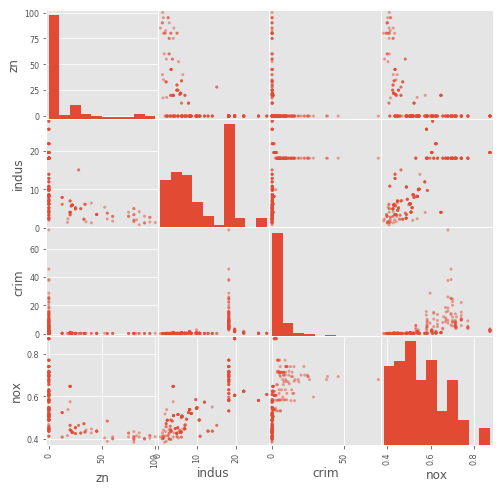

In [28]:
"""
nox: nitrogen oxide concentration (parts per 10 million)
the larger number of property set aside for industry, the amount of nos increases 

"""

pd.plotting.scatter_matrix(df[cols], figsize=(8,8));

## Correlation Between Each Feature
How do features relate to each other<br>

In [4]:
"""
medvi has a high correlaiton to LSTAT-higher propertion inversely correlates to price
med hig hcorrelation to rm
"""
df.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


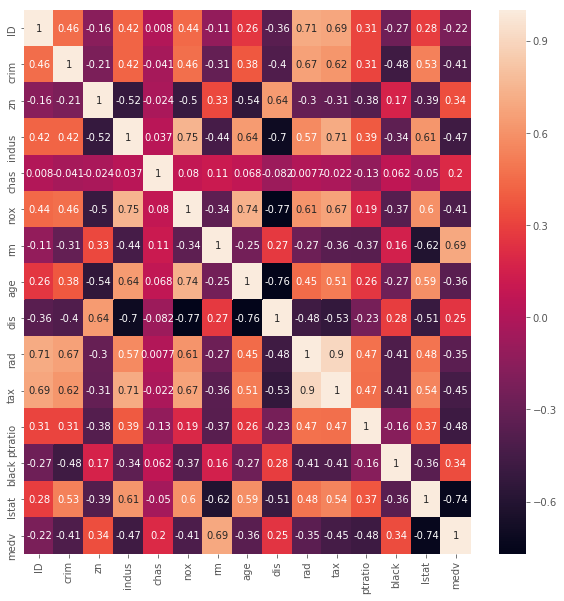

In [30]:
#why do house prcies go up and doewn
#rm and medv corresltion is high
#tax and medv ar enegatively correlated
#ptratio and medv are inversely correlatee
#crim and medv are inversely corealted-prices go down
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

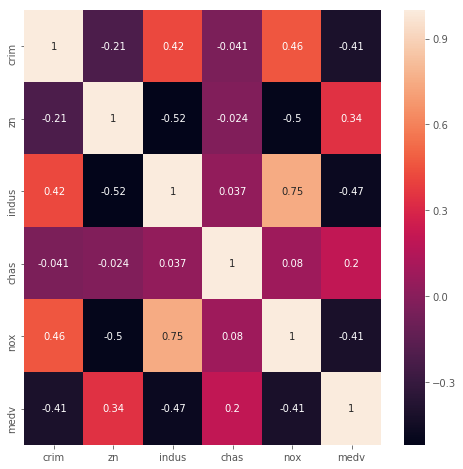

In [5]:
plt.figure(figsize=(8,8))
cols_heat = ['crim','zn','indus','chas','nox','medv']
sns.heatmap(df[cols_heat].corr(), annot=True);

In [ ]:
#explore measures of centrality and dispersion for at least 3 variables

/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


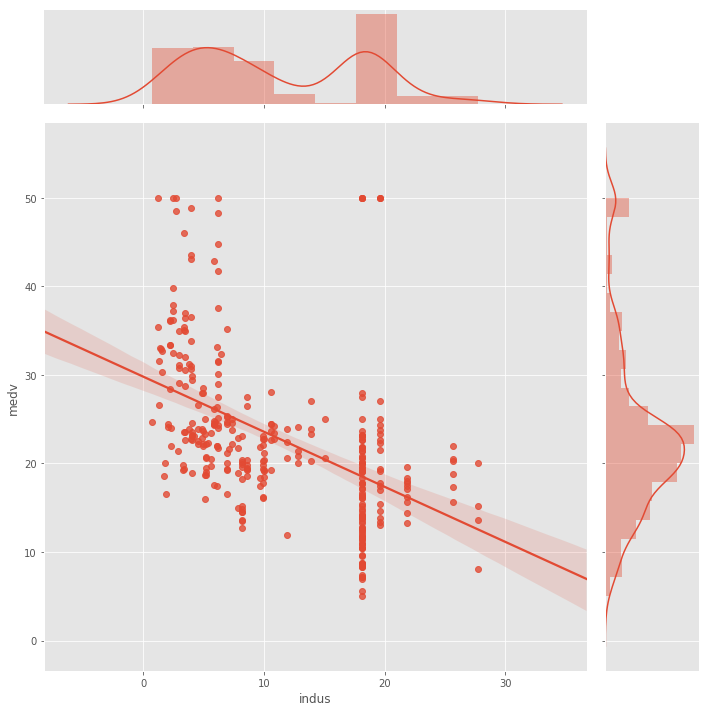

In [10]:
sns.jointplot(df['indus'],df['medv'], kind='reg', height=10)

/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Average Number of Rooms Per Dwelling')

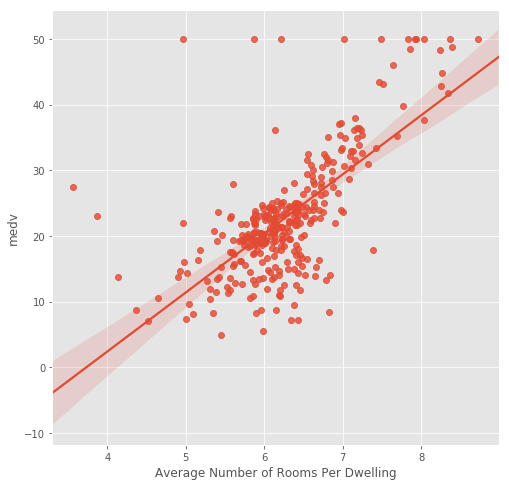

In [11]:
plt.figure(figsize=(8,8))
sns.regplot(df['rm'],df['medv']);
plt.xlabel('Average Number of Rooms Per Dwelling')

/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


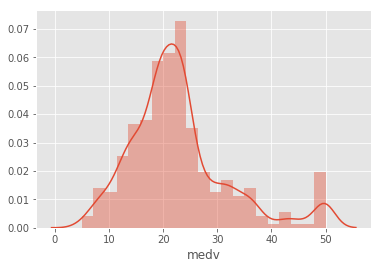

In [13]:
#distribution of the price
#average prcie is around 200,000
#looks normmally distributed

sns.distplot(df['medv']);

In [1]:
"""
Create meaningful subsets of the data using selection operations like .loc, .iloc, or related operations. 
Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't
Create two new DataFrames based on a certain split for crime rate
"""

"\nCreate meaningful subsets of the data using selection operations like .loc, .iloc, or related operations. \nExplain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:\nCreate two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't\nCreate two new DataFrames based on a certain split for crime rate\n"

In [4]:
"""
def contains_n(text):
    if 'N' in text:
        return True
    else:
        return False

# Or the shorter, more pythonic way
def contains_n(text):
    bool_val = 'N' in text
    return bool_val

df['On_N_Line'] = df['LINENAME'].map(contains_n)

"""
df_amend = df.copy()

In [6]:
df_amend['medv'].describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [30]:
def price_range(text):
    text = str(text)
    for price in text:
        if price <= '18':
            return 'low'
        elif price <= '22':
            return 'medium'
        else:
            return 'high'

df_amend['price_range'] = df_amend['medv'].map(price_range)

In [31]:
df_amend.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,price_range
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,medium
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,medium
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,high
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,high
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,medium


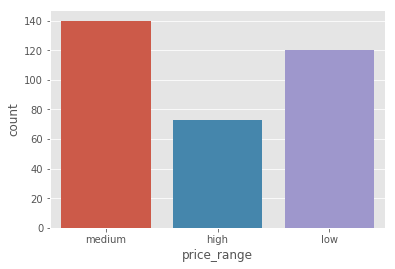

In [33]:
#plt.hist(df_amend['price_range'])
sns.countplot(data=df_amend, x='price_range');

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!